In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import imutils
import winsound

In [13]:
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/New Man Movement/Export_2020-02-25_172237/0 - 2020-02-20 13-26-00-057.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

4499.0

In [14]:
cap.set(cv2.CAP_PROP_POS_FRAMES,300)

True

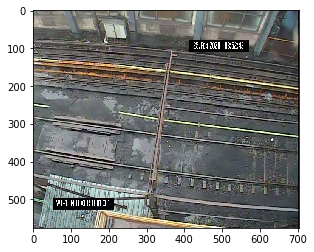

In [15]:
emptytrack = cv2.imread("emptyTrack.jpg")
hls = cv2.cvtColor(emptytrack.copy(),cv2.COLOR_BGR2HLS_FULL)
hl,l,emptytracksl = cv2.split(hls)
plt.imshow(emptytrack)

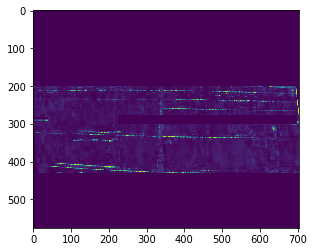

In [16]:
emptytracksl = imutils.rotate(emptytracksl,6)
emptytracksl[0:200,] = 0
emptytracksl[430:-1,] = 0
emptytracksl[282:289,0:40] = 0
emptytracksl[278:300,225:700] = 0
plt.imshow(emptytracksl)

In [19]:
frequency = 2500
duration = 25

In [18]:
while True:
    ret, frame = cap.read()

    if frame is None:
        break
    hls = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2HLS_FULL)
    hl,l,sl = cv2.split(hls)

    subbb = cv2.absdiff(sl,emptytracksl)

    sl = imutils.rotate(sl,6)
    sl[0:200,] = 0
    sl[430:-1,] = 0
    sl[282:289,0:40] = 0
    sl[278:300,225:700] = 0
    sl[:,-15:-1] = 0

    slandsl = cv2.addWeighted(sl,.01, sl, 1., 0.0)
    _,threh = cv2.threshold(slandsl,230,255,cv2.THRESH_BINARY)

    #    subbb = cv2.absdiff(emptytracksl,sl)

    #threh = cv2.erode(threh,(5,5),iterations = 2)
    _,contours, hierarchy = cv2.findContours(threh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours,key= cv2.contourArea,reverse= True)[0:20]
    for i in cnts:
        if cv2.contourArea(i) > 55 and cv2.contourArea(i) < 2000:
            cv2.drawContours(frame,i,-1,(0,255,0),10)
            x,y,w,h = cv2.boundingRect(i)
            if y < 350 and y > 220:
                cv2.putText(frame, "....Man IN Danger Zone....", (int(650/2)-150, 50+20),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),3)

                winsound.Beep(frequency, 25)


    cv2.imshow("frame",frame)
    cv2.imshow("threh",threh)
    cv2.imshow("sub",subbb)
    #cv2.imshow("dil",dilation)
    time.sleep(.01)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
break

In [ ]:
plt.imshow(threh)

In [ ]:
cv2.contourArea(cnts[0])

In [ ]:
len(contours)

In [ ]:
contours = sorted(contours,key= cv2.contourArea)

In [ ]:
for i in range(len(contours)):
    print(cv2.contourArea(contours[i]))


In [ ]:
ret, frame = cap.read()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print(frame.shape)
plt.imshow(frame)

In [ ]:
#cv2.imwrite("emptyTrack.jpg",frame)

In [ ]:
emptytrack = cv2.imread("emptyTrack.jpg",0)
plt.imshow(emptytrack)

In [ ]:
#%matplotlib notebook

In [ ]:
cv2.line(frame ,(0,0),(frame.shape[1],0),(255),10)
rot = imutils.rotate(frame,1)
plt.imshow(rot)

In [ ]:
frame.shape[1]

In [ ]:
gry = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
_,threh = cv2.threshold(gry,80,250,cv2.THRESH_BINARY)
plt.imshow(threh)

In [ ]:
plt.imshow(gry)

In [ ]:
%matplotlib notebook

In [ ]:
plt.imshow(cv2.absdiff(emptytrack,gry))

In [ ]:
yuv = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2YUV)
y,u,vb = cv2.split(yuv)
        

In [ ]:
cv2.imshow("y",y)
cv2.imshow("u",u)
cv2.imshow("v",vb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
hsv = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2HSV_FULL)
h,s,v = cv2.split(hsv)
        

In [ ]:
cv2.imshow("h",h)
cv2.imshow("s",s)
cv2.imshow("v",v)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
hls = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2HLS_FULL)
hl,l,sl = cv2.split(hls)
        

In [ ]:
cv2.imshow("hl",hl)
cv2.imshow("l",l)
cv2.imshow("sl",sl)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.imshow(sl)

In [ ]:
vandsl = cv2.addWeighted(sl,1 , sl, 2., 0.0)  #good 220
cv2.imshow("v&sl",vandsl)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.imshow(vandsl)

In [ ]:
vandsl = cv2.addWeighted(y, .5, b, 2., 0.0)  #good 220
cv2.imshow("v&sl",vandsl)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
break

In [ ]:
backSub = cv2.createBackgroundSubtractorMOG2(300, 400, 2)
#backSub = cv2.createBackgroundSubtractorKNN(detectShadows=True)
    


#template = cv2.imread('template2.jpg',0)


if not cap.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        break
    
    blurFrame = cv2.GaussianBlur(frame,(9,9),0)
    
    fgMask = backSub.apply(blurFrame)
    
    cv2.rectangle(fgMask, (410, 80), (573,110), (0), -1)
    cv2.rectangle(fgMask, (20, 300), (40,345), (0), -1)  # time = [410,80,573,110]  blinkRed = [20,300,40,345]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    fgMask = dilation = cv2.dilate(fgMask,kernel,iterations = 5)
    
    '''img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)'''
    
    
    # thrsh
    _,undistortedThreh = cv2.threshold(fgMask,230,250,cv2.THRESH_BINARY) 
    blank = np.zeros((frame.shape),np.uint8)
    #print(blank.shape,"shape<------------------------------")
    # cnts
    _ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    
    if len(cnts)< 15:
        for c in cnts:
            #print(cv2.contourArea(c))
            if cv2.contourArea(c) < 3000 and cv2.contourArea(c) > 35:
                perimeter = cv2.arcLength(c,True)
                epsilon = 0.0001*cv2.arcLength(c,True)
                approx = cv2.approxPolyDP(c,epsilon,True)
                x,y,w,h = cv2.boundingRect(approx)
                if x > 165 and x < 691 and y > 190 and y < 340:# (165, 190, 691, 423)
                    #cv2.rectangle(frame, (250,45), (350,85), (255,255,255), -1)
                    cv2.putText(frame, "....Man IN Danger Zone....", (175, 45),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),2)
                    
                #cv2.rectangle(frame, (x, y), (x+w,y+h), (0,255,25), 5)
                cntDraw = cv2.drawContours(blank,[approx],-1,255,1)
                
                #imgGray = cv2.cvtColor(frame[y-15:y+h+10, x-15:x+w+10],cv2.COLOR_BGR2GRAY)
                #plt.imshow(blank[y-15:y+h+10, x-15:x+w+10])
                #cv2.imshow('Frame', cntDraw)
                
                imgGray = cv2.cvtColor(cntDraw[y:y+h, x:x+w],cv2.COLOR_BGR2GRAY)
                circles = cv2.HoughCircles(imgGray, cv2.HOUGH_GRADIENT, 1, 300)

                # ensure at least some circles were found
                if circles is not None:
                    print("xbcjkbjkxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
                    # convert the (x, y) coordinates and radius of the circles to integers
                    circles = np.round(circles[0, :]).astype("int")

                    # loop over the (x, y) coordinates and radius of the circles
                    for (x, y, r) in circles:
                        # draw the circle in the output image, then draw a rectangle
                        # corresponding to the center of the circle
                        cv2.circle(frame, (x, y), r, (0, 255, 0), -1)
                        cv2.rectangle(frame, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
                        
#                else:
#                    print("noooooooo circle")

                
                
    '''elif len(cnts) == 0 or len(cnts) == None or len(cnts) >15:
        cv2.putText(frame, "....temp matching....", (175, frame.shape[0] - 45),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),2)
        print("_______________________________")
        x
        imgGray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        res = cv2.matchTemplate(imgGray,template,cv2.TM_CCOEFF_NORMED) #cv2.TM_CCOEFF_NORMED)cv2.TM_CCOEFF
        threshold = 0.59
        loc = np.where( res >= threshold)
        
        
        # h circles
        
        circles = cv2.HoughCircles(imgGray, cv2.HOUGH_GRADIENT, 1, 500)

        # ensure at least some circles were found
        if circles is not None:
            # convert the (x, y) coordinates and radius of the circles to integers
            circles = np.round(circles[0, :]).astype("int")

            # loop over the (x, y) coordinates and radius of the circles
            for (x, y, r) in circles:
                # draw the circle in the output image, then draw a rectangle
                # corresponding to the center of the circle
                cv2.circle(frame, (x, y), r, (0, 255, 0), 4)
                cv2.rectangle(frame, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        if len(loc) == 2:
            for pt in zip(*loc[::-1]):
                print(pt)
                cv2.rectangle(imgGray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
                template = imgGray[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
                w, h = template.shape[::-1]
                break
'''        ''' else:
            template = cv2.imread('template1.jpg',0)
            w, h = template.shape[::-1]'''


        
            
            
        
    #print("Next----------------------------------------------------------------------------------------------")
    
    #draw cnt
    
    
    
        
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    #cv2.imshow('thresh', undistortedThreh)
    #cv2.imshow('Cnt Draw', cntDraw)
    time.sleep(.1)
    
    '''cv2.imshow('g', g)
    cv2.imshow('b', b)
    cv2.imshow('h', h)
    cv2.imshow('s', s)
    cv2.imshow('v', v)'''
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
'''circles = cv2.HoughCircles(sl,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=10)
    
    if circles is not None: 

        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(frame,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(frame,(i[0],i[1]),2,(0,0,255),3)
    else:
        print(circles)'''